In [1]:
import gzip
import json
import os

def print_column_names_from_json_gz(file_path):
    with gzip.open(file_path, 'rt', encoding='utf-8') as file:
        for line in file:
            try:
                data = json.loads(line)
                if isinstance(data, dict):
                    column_names = list(data.keys())
                    print("Column Names:")
                    for name in column_names:
                        print(name)
                    break  # Assuming the first line contains the column names
            except json.JSONDecodeError:
                print("Error: JSON data is not in the expected format.")

# Define the file path relative to the /kaggle/input/ directory
file_path = '/kaggle/input/information-retrieval/Electronics_5.json'
print_column_names_from_json_gz(file_path)

Column Names:
overall
vote
verified
reviewTime
reviewerID
asin
style
reviewerName
reviewText
summary
unixReviewTime


In [2]:
import gzip
import json

def print_column_names_from_json_gz(file_path):
    with gzip.open(file_path, 'rt', encoding='utf-8') as file:
        for line in file:
            try:
                data = json.loads(line)
                if isinstance(data, dict):
                    column_names = list(data.keys())
                    print("Column Names:")
                    for name in column_names:
                        print(name)
                    break  # Assuming the first line contains the column names
            except json.JSONDecodeError:
                print("Error: JSON data is not in the expected format.")

# Use raw string literal for the file path
file_path = r'/kaggle/input/information-retrieval/meta_Electronics.json'
print_column_names_from_json_gz(file_path)

Column Names:
category
tech1
description
fit
title
also_buy
tech2
brand
feature
rank
also_view
main_cat
similar_item
date
price
asin
imageURL
imageURLHighRes


In [3]:
import pandas as pd
import gzip

# Define chunk size
chunk_size = 10000

# Initialize an empty list to store chunks of data
chunks = []

# Open the gzipped JSON file and decompress it
with gzip.open('/kaggle/input/information-retrieval/Electronics_5.json', 'rt', encoding='utf-8') as file:
    # Read the JSON data in chunkssn
    while True:
        chunk = pd.read_json(file, lines=True, nrows=chunk_size)
        if chunk.empty:
            break
        chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
el_df = pd.concat(chunks, ignore_index=True)
print("electonics data loaded into el_df dataframe")


electonics data loaded into el_df dataframe


In [4]:
import pandas as pd
import gzip

# Define chunk size
chunk_size = 10000

# Initialize an empty list to store chunks of data
chunks = []

# Open the gzipped JSON file and decompress it
with gzip.open('/kaggle/input/information-retrieval/meta_Electronics.json', 'rt', encoding='utf-8') as file:
    # Read the JSON data in chunks
    while True:
        chunk = pd.read_json(file, lines=True, nrows=chunk_size)
        if chunk.empty:
            break
        chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
meta_df = pd.concat(chunks, ignore_index=True)
print("meta data loaded into meta_df dataframe.")


meta data loaded into meta_df dataframe.


In [5]:
# Convert the 'title' column to lowercase
meta_df['title_lower'] = meta_df['title'].str.lower()

# Filter dataframe for entries where the title contains "headphone" or "headphones" in lower case
headphone_df = meta_df[meta_df['title_lower'].str.contains('headphone|headphones', na=False)]

# Get the total number of rows for the headphones dataframe
total_rows_headphone = len(headphone_df)
print("3)Total number of rows for the headphone dataframe:", total_rows_headphone)


3)Total number of rows for the headphone dataframe: 27412


In [6]:
# Merge el_df and meta_df on the 'asin' column
merged_df = pd.merge(el_df, meta_df, on='asin', how='outer')


In [7]:
# Convert the 'title' column to lowercase
merged_df['title_lower'] = merged_df['title'].str.lower()

# Filter dataframe for entries where the title contains "headphone" or "headphones" in lower case
merged_df_hp = merged_df[merged_df['title_lower'].str.contains('headphone|headphones', na=False)]

merged_df_hp.dropna(subset=["asin"],inplace=True)

# Drop duplicate rows from the merged DataFrame, considering only relevant columns
merged_df_hp.drop_duplicates(subset=['asin'], inplace=True)


/tmp/ipykernel_34/1999504084.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_hp.dropna(subset=["asin"],inplace=True)
/tmp/ipykernel_34/1999504084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_hp.drop_duplicates(subset=['asin'], inplace=True)


In [108]:
#Q4) Print the number of reviews for headphones
total_row=len(merged_df_hp)
print("total rows after preprocessing ",total_row)


total rows after preprocessing  26865


In [109]:
total_review=len(merged_df_hp['reviewText'])
print("a) total no of review for headphone or headphones :", total_review)

a) total no of review for headphone or headphones : 26865


In [110]:
average_rating_score=merged_df_hp['overall'].mean()
print("b)average rating score for headphone: ", average_rating_score)

b)average rating score for headphone:  4.082961309523809


In [11]:
num_unique_product=merged_df_hp['asin'].nunique()
print("c)number of unique products for headphone :",num_unique_product)

c)number of unique products for headphone : 26865


In [16]:
print("size of rating :",merged_df_hp['overall'].count())

size of rating : 8064


In [12]:
good_rating=merged_df_hp[merged_df_hp['overall']>=3]['overall'].count()
print("d) total number of good rating for the headphones",good_rating)

d) total number of good rating for the headphones 6889


In [13]:
bad_rating=merged_df_hp[merged_df_hp['overall']<3]['overall'].count()
print("e) total number of bad rating for the headphone :",bad_rating)

e) total number of bad rating for the headphone : 1175


In [14]:
rating_count_series=merged_df_hp['overall'].value_counts()
print("f)number of reviews corrosponding to each rating :-\n", rating_count_series)

f)number of reviews corrosponding to each rating :-
 overall
5.0    4469
4.0    1629
3.0     791
1.0     659
2.0     516
Name: count, dtype: int64


In [24]:
!pip install nltk

In [25]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 76.6 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [27]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('wordnet2022')

import spacy
nlp = spacy.load('en_core_web_sm')


!cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet




[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to /usr/share/nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!


In [28]:
# q.5) preprocess of the text
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Example dictionary of acronyms and their expansions
acronyms_dict = {
    "NC": "Noise-Cancelling",
    "BT": "Bluetooth Technology",
    "NMPB": "Nameless Multiplayer Piano Bot",
    "ACT": "Advanced Circuit Technology",
    "ADL": "Alpha Design Labs",
    "AH": "A100 Headphones",
    "AIM": "Audio Interface Mixer",
    "AKG": "Actionable Knowledge Graph",
    "ALC": "Auto Level Control",
    "AM": "Acoustic Meshes",
    "ANC": "Active Noise Cancellation",
    "ASP": "Analogue Spatial Processing",
    "AT": "Audio-Technica",
    "ATH": "Audio Technica Headphones",
    "B&O": "Bang and Olufsen",
    "WLHP": "WireLess HeadPhone",
    "PHWN": "HeadPHone Winder",
    "HC": "Headphone Coupling",
    "TDH": "Telephonics Dynamic Headphone",
    "SHA": "Studio Headphone Amplifier",
    "M2 OEI": "Momentum2 On Ear Headphone ipod",
    "DHIVI": "Dolby Headphone Plugin for Intervideo"
}

def expand_acronyms(text, acronyms_dict):
    for acronym, expansion in acronyms_dict.items():
        text = text.replace(acronym, expansion)
    return text

def preprocess_text(text):
    # Removing HTML Tags
    text = re.sub(r'<[^>]+>', '', text)
    
    # Removing accented characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    # Expanding acronyms
    text = expand_acronyms(text, acronyms_dict)
    
    # Removing Special Characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lemmatization (ensure WordNet corpus is available)
    lemmatizer = WordNetLemmatizer()
    
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens]
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Drop rows with missing 'reviewText' values
merged_df_hp.dropna(subset=["reviewText"], inplace=True)

merged_df_hp.loc[:, 'clean_reviewText'] = merged_df_hp['reviewText'].apply(lambda x: preprocess_text(x) if pd.notnull(x) else '')

# Save the preprocessed text into a CSV file with escape character specified
merged_df_hp.to_csv('/kaggle/working/preprocessed_Text.csv', index=False, escapechar='\\')


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/tmp/ipykernel_34/365207681.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_hp.dropna(subset=["reviewText"], inplace=True)
/tmp/ipykernel_34/365207681.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_hp.loc[:, 'clean_reviewText'] = merged_df_hp['reviewText'].apply(lambda x: preprocess_text(x) if pd.notnull(x) else '')


In [31]:
# Print the first 10 elements of the 'clean_reviewText' column using a for loop
for idx, clean_review in enumerate(merged_df_hp['clean_reviewText'].head(10)):
    print(f"Review {idx + 1}: {clean_review}")


Review 1: ['great', 'headphone', 'cord', 'short']
Review 2: ['im', 'getting', 'listening', 'station', 'going', 'several', 'elementary', 'classroom', 'proved', 'reliable', 'kidproof', 'reasonably', 'priced', 'limit', 'quantity', 'im', 'getting', 'one', 'brand', 'brand', 'ive', 'gotten', 'worked']
Review 3: ['suck', 'bought', 'wa', 'walking', 'work', 'one', 'day', 'drug', 'store', 'got', 'ripped', 'paid', 'suck', 'uncomfortable', 'ear', 'soft', 'rubber', 'hard', 'plastic', 'even', 'really', 'molded', 'fit', 'ear', 'plug', 'wa', 'shorting', 'second', 'plugged', 'requires', 'much', 'twisting', 'bending', 'get', 'sound', 'since', 'dont', 'fit', 'well', 'average', 'ear', 'sound', 'quality', 'end', 'sounding', 'super', 'tinny', 'found', 'reverse', 'left', 'right', 'earpiece', 'twist', 'degree', 'angle', 'front', 'sound', 'ok', 'comfortable', 'cant', 'wear', 'like', 'minute', 'white', 'like', 'every', 'earbuds', 'available', 'market', 'today', 'wasnt', 'plugging', 'ipod', 'look', 'yuppie', 'bu

In [32]:
# Q 6) extract relevant statistics

# Import necessary libraries
import pandas as pd


# Group by brand and count the number of reviews for each brand
brand_review_counts = merged_df_hp.groupby('brand').size().reset_index(name='review_count')

# Sort the brands based on review counts in descending order
top_20_most_reviewed_brands = brand_review_counts.sort_values(by='review_count', ascending=False).head(20)
top_20_least_reviewed_brands = brand_review_counts.sort_values(by='review_count').head(20)

# Display the top 20 most reviewed brands
print("a) Top 20 most reviewed brands:")
print(top_20_most_reviewed_brands)

# Display the top 20 least reviewed brands
print("\n b)Top 20 least reviewed brands:")
print(top_20_least_reviewed_brands)


a) Top 20 most reviewed brands:
               brand  review_count
1744            Sony           334
1675      Sennheiser           189
1468         Philips           128
205   Audio-Technica           112
992              JVC           106
1450       Panasonic            88
1714      Skullcandy            88
802          Geekria            87
354             Bose            78
290            Beats            74
1274         Monster            65
977              JBL            61
1089            Koss            57
1752    Sound Intone            49
806          Generic            49
1505            Pyle            48
340          Bluedio            47
46               AKG            44
984             JLAB            40
1812     Symphonized            39

 b)Top 20 least reviewed brands:
              brand  review_count
2329    shinefuture             1
2330      sinseader             1
2334     teambuckle             1
2335         tech21             1
2321    onelinkmore          

In [33]:
# Calculate the average rating for each headphone 
average_rating_per_product = merged_df_hp.groupby('title')['overall'].mean().reset_index(name='average_rating')

# Find the product with the highest average rating
most_positively_reviewed_product = average_rating_per_product.loc[average_rating_per_product['average_rating'].idxmax()]

# Print the most positively reviewed product
print("c) Most positively reviewed product:")
print(most_positively_reviewed_product)


c) Most positively reviewed product:
title              AKG K 420 Foldable Mini Headphone - Blue (Dis...
average_rating                                                  5.0
Name: 2, dtype: object


In [34]:
import pandas as pd

# Filter out rows where 'date' column doesn't contain valid date information
valid_date_rows = merged_df_hp['date'].str.contains('\d{4}$', na=False)
data = merged_df_hp[valid_date_rows].copy()

# Convert 'date' column to datetime format with the specified format
data['date'] = pd.to_datetime(data['date'], format='%B %d, %Y')

# Extract only the year from the 'date' column
data['year'] = data['date'].dt.year

# Filter data for the consecutive 5 years from 2014 to 2018
filtered_data = data[(data['date'].dt.year >= 2014) & (data['date'].dt.year <= 2018)]

# Group by 'year' and count the number of ratings for each year
ratings_by_year = filtered_data.groupby('year').size()

# Print count of ratings for headphones over the consecutive 5 years
print("d) Count of ratings for headphones over the consecutive 5 years from 2014 to 2018:")
print(ratings_by_year)


d) Count of ratings for headphones over the consecutive 5 years from 2014 to 2018:
year
2014    822
2015    952
2016    614
2017     53
2018     81
dtype: int64


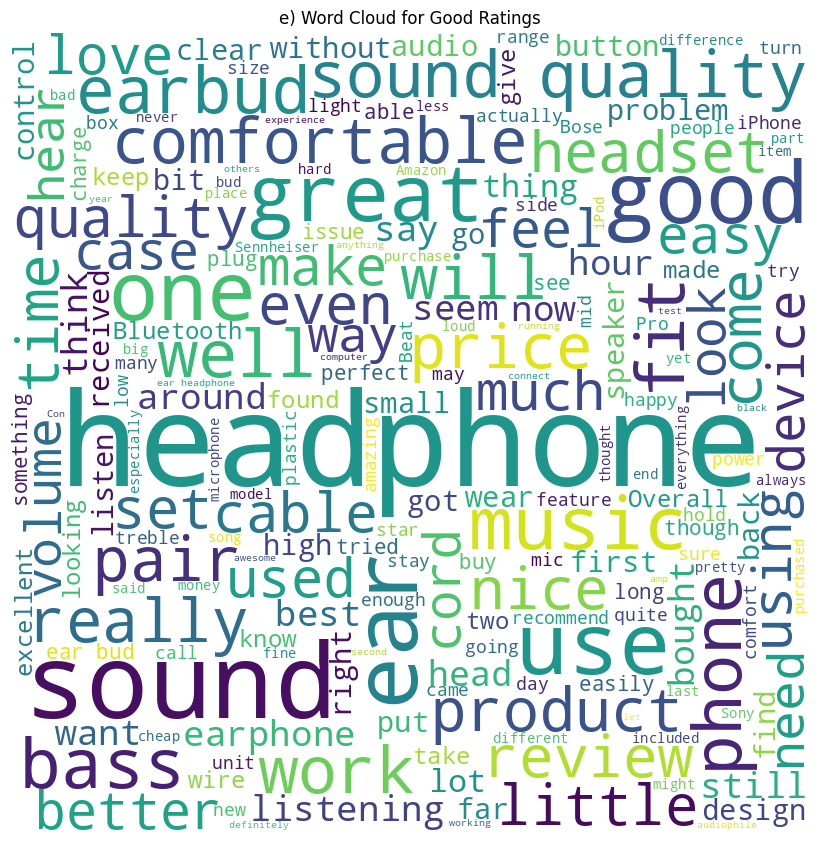

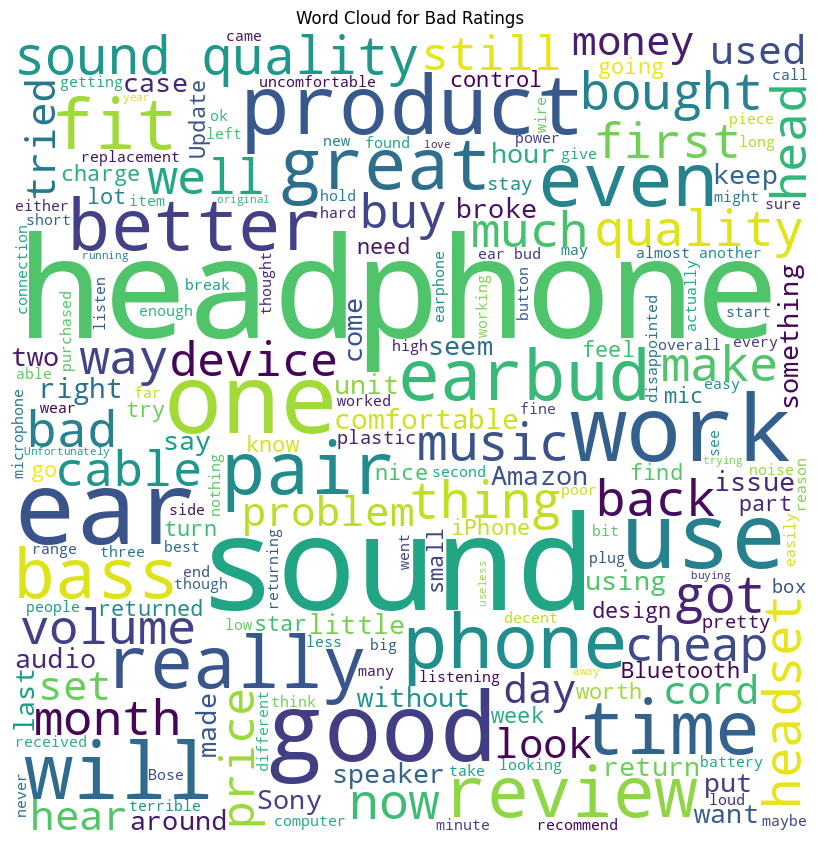

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract reviews for 'Good' ratings
good_reviews = merged_df_hp[merged_df_hp['overall'] >= 3]['reviewText'].dropna().str.cat(sep=' ')

# Extract reviews for 'Bad' ratings
bad_reviews = merged_df_hp[merged_df_hp['overall'] <3]['reviewText'].dropna().str.cat(sep=' ')

# Generate WordCloud for 'Good' ratings
good_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(good_reviews)

# Generate WordCloud for 'Bad' ratings
bad_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(bad_reviews)

# Plot WordCloud for 'Good' ratings
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(good_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('e) Word Cloud for Good Ratings')
plt.show()

# Plot WordCloud for 'Bad' ratings
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(bad_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Word Cloud for Bad Ratings')
plt.show()


In [36]:
# Extract words and their frequencies from the WordCloud for 'Good' ratings
good_word_freq = good_wordcloud.words_

# Extract words and their frequencies from the WordCloud for 'Bad' ratings
bad_word_freq = bad_wordcloud.words_

# Report the most commonly used words for positive reviews
print("Most commonly used words for positive reviews:")
for word, freq in good_word_freq.items():
    print(f"{word}: {freq}")

# Report the most commonly used words for negative reviews
print("\nMost commonly used words for negative reviews:")
for word, freq in bad_word_freq.items():
    print(f"{word}: {freq}")


Most commonly used words for positive reviews:
headphone: 1.0
sound: 0.6006768189509306
ear: 0.42455006922012
use: 0.39732348869404704
good: 0.3913244116289802
one: 0.36548223350253806
great: 0.33902476542070453
music: 0.2910321489001692
bass: 0.2578064913090294
phone: 0.24180895246885095
fit: 0.23934779264728503
well: 0.22934933087217352
work: 0.22504230118443316
earbud: 0.22504230118443316
sound quality: 0.2248884786955853
comfortable: 0.22011998154130133
pair: 0.21658206429780033
will: 0.21227503461006
price: 0.21181356714351637
really: 0.20858329487771113
product: 0.20289186279033994
review: 0.19166282110444546
time: 0.19027841870481466
come: 0.18843254883864022
nice: 0.1868943239501615
headset: 0.1833564067066605
set: 0.17551145977541915
little: 0.1738194123980926
quality: 0.17166589755422243
even: 0.17120443008767883
cable: 0.16643593293339487
using: 0.16289801568989387
make: 0.16074450084602368
used: 0.1596677434240886
much: 0.15782187355791416
love: 0.1565912936471312
easy: 0.1

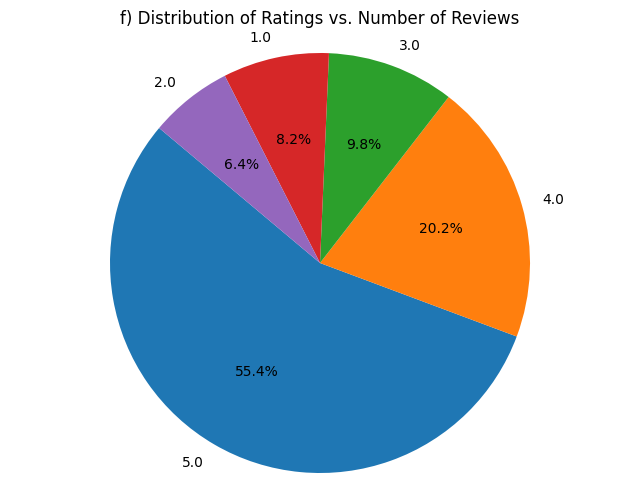

In [37]:
import matplotlib.pyplot as plt

# Count the number of reviews for each rating
rating_distribution = merged_df_hp['overall'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(rating_distribution, labels=rating_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('f) Distribution of Ratings vs. Number of Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [38]:
# Grouping the original data by year and counting the number of reviews for each year
reviews_by_year = data.groupby('year').size()

# Finding the year with the maximum number of reviews
max_reviews_year = reviews_by_year.idxmax()

# Printing the result
print("g) The year with the maximum number of reviews:", max_reviews_year)


g) The year with the maximum number of reviews: 2015


In [39]:
# Grouping the data by year and counting the number of unique customers for each year
customers_by_year = data.groupby(data['date'].dt.year)['reviewerID'].nunique()

# Finding the year with the highest number of customers
max_customers_year = customers_by_year.idxmax()

# Printing the result
print("f) The year with the highest number of customers:", max_customers_year)


f) The year with the highest number of customers: 2015


In [ ]:
# # q.5) preprocess of the text
# import re
# import unicodedata
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer
# import pandas as pd

# # Download NLTK resources
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

# # Example dictionary of acronyms and their expansions
# acronyms_dict = {
#     "NC": "Noise-Cancelling",
#     "BT": "Bluetooth Technology",
#     "NMPB": "Nameless Multiplayer Piano Bot",
#     "ACT": "Advanced Circuit Technology",
#     "ADL": "Alpha Design Labs",
#     "AH": "A100 Headphones",
#     "AIM": "Audio Interface Mixer",
#     "AKG": "Actionable Knowledge Graph",
#     "ALC": "Auto Level Control",
#     "AM": "Acoustic Meshes",
#     "ANC": "Active Noise Cancellation",
#     "ASP": "Analogue Spatial Processing",
#     "AT": "Audio-Technica",
#     "ATH": "Audio Technica Headphones",
#     "B&O": "Bang and Olufsen",
#     "WLHP": "WireLess HeadPhone",
#     "PHWN": "HeadPHone Winder",
#     "HC": "Headphone Coupling",
#     "TDH": "Telephonics Dynamic Headphone",
#     "SHA": "Studio Headphone Amplifier",
#     "M2 OEI": "Momentum2 On Ear Headphone ipod",
#     "DHIVI": "Dolby Headphone Plugin for Intervideo"
# }

# def expand_acronyms(text, acronyms_dict):
#     for acronym, expansion in acronyms_dict.items():
#         text = text.replace(acronym, expansion)
#     return text

# def preprocess_text(text):
#     # Removing HTML Tags
#     text = re.sub(r'<[^>]+>', '', text)
    
#     # Removing accented characters
#     text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
#     # Expanding acronyms
#     text = expand_acronyms(text, acronyms_dict)
    
#     # Removing Special Characters and numbers
#     text = re.sub(r'[^a-zA-Z\s]', '', text)
    
#     # Tokenization
#     tokens = word_tokenize(text)
    
#     # Lemmatization (ensure WordNet corpus is available)
#     lemmatizer = WordNetLemmatizer()
    
#     tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens]
    
#     # Removing stopwords
#     stop_words = set(stopwords.words('english'))
#     tokens = [word for word in tokens if word not in stop_words]
    
#     return tokens

# # Drop rows with missing 'reviewText' values
# merged_df.dropna(subset=["reviewText"], inplace=True)

# # Apply the preprocess_text function only to non-null values
# merged_df_hp['clean_reviewText'] = merged_df_hp['reviewText'].apply(lambda x: preprocess_text(x) if pd.notnull(x) else '')

# # Save the preprocessed text into a CSV file
# merged_df_hp.to_csv('/kaggle/working/preprocessed_text.csv', index=False)

In [41]:
import numpy as np
import math
from collections import Counter

def create_vocab(preprocessed_reviews):
    uniq_words = set()
    if isinstance(preprocessed_reviews, list):
        for doc in preprocessed_reviews:
            if doc is not None:
                for word in doc:
                    uniq_words.add(word)
        uniq_words = sorted(list(uniq_words))
        vocab = {word: idx for idx, word in enumerate(uniq_words)}
        return vocab
    else:
        print("Incorrect format")

def calculate_idf(uniq_words, preprocessed_reviews):
    idf_dict = {}
    num = len(preprocessed_reviews)
    for word in uniq_words:
        count = sum(1 for doc in preprocessed_reviews if doc and word in doc)
        idf_dict[word] = float(1 + math.log((num + 1) / (count + 1)))
    return idf_dict

def convert(preprocessed_reviews, vocab, idf_dict):
    if isinstance(preprocessed_reviews, list):
        tfidf_matrix = np.zeros((len(preprocessed_reviews), len(vocab)))
        for idx, doc in enumerate(preprocessed_reviews):
            if doc is not None:
                word_freq = dict(Counter(doc))
                for word, freq in word_freq.items():
                    col_index = vocab.get(word, -1)
                    if col_index != -1:
                        tf = freq / float(len(preprocessed_reviews))
                        idf_ = idf_dict[word]
                        tfidf_matrix[idx, col_index] = tf * idf_
        norms = np.linalg.norm(tfidf_matrix, axis=1)[:, np.newaxis]
        zero_indices = np.where(norms == 0)[0]
        norms[zero_indices] = 1
        norms[np.isnan(norms)] = 0
        tfidf_matrix /= norms
        return tfidf_matrix
    else:
        print("Incorrect format")

# Assuming merged_df contains preprocessed reviews in the 'preprocessed_review' column
preprocessed_reviews = merged_df_hp['clean_reviewText'].tolist()

# Step 1: Create vocabulary
vocab = create_vocab(preprocessed_reviews)

# Step 2: Calculate IDF
idf_dict = calculate_idf(list(vocab.keys()), preprocessed_reviews)

# Step 3: Convert to TF-IDF matrix
tfidf_matrix = convert(preprocessed_reviews, vocab, idf_dict)




In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Define the Rating Class categories
def get_rating_class(rating):
    if rating > 3:
        return 'Good'
    elif rating == 3:
        return 'Average'
    else:
        return 'Bad'

# Apply the rating class function to the target variable
merged_df_hp['rating_class'] = merged_df_hp['overall'].apply(get_rating_class)

# Split the data into features (X) and target variable (y)
X = tfidf_matrix  # Using TF-IDF matrix
y = merged_df_hp['rating_class']

# Split the data into train and test sets (75:25 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define machine learning models
models = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Evaluating {name}...")
    print(classification_report(y_test, y_pred))


/tmp/ipykernel_34/4229491728.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_hp['rating_class'] = merged_df_hp['overall'].apply(get_rating_class)


Training Multinomial Naive Bayes...
Evaluating Multinomial Naive Bayes...
              precision    recall  f1-score   support

     Average       0.00      0.00      0.00       189
         Bad       0.00      0.00      0.00       297
        Good       0.76      1.00      0.86      1530

    accuracy                           0.76      2016
   macro avg       0.25      0.33      0.29      2016
weighted avg       0.58      0.76      0.65      2016

Training Logistic Regression...


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating Logistic Regression...
              precision    recall  f1-score   support

     Average       0.32      0.04      0.07       189
         Bad       0.79      0.42      0.55       297
        Good       0.82      0.99      0.90      1530

    accuracy                           0.81      2016
   macro avg       0.64      0.48      0.51      2016
weighted avg       0.77      0.81      0.77      2016

Training Random Forest Classifier...
Evaluating Random Forest Classifier...
              precision    recall  f1-score   support

     Average       0.33      0.01      0.02       189
         Bad       0.85      0.26      0.40       297
        Good       0.79      0.99      0.88      1530

    accuracy                           0.79      2016
   macro avg       0.66      0.42      0.43      2016
weighted avg       0.76      0.79      0.73      2016

Training Support Vector Classifier...
Evaluating Support Vector Classifier...
              precision    recall  f1-score   supp

In [44]:
from catboost import CatBoostClassifier

# Add CatBoost to the models dictionary
models['CatBoost Classifier'] = CatBoostClassifier()

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Evaluating {name}...")
    print(classification_report(y_test, y_pred))


Training Multinomial Naive Bayes...
Evaluating Multinomial Naive Bayes...
              precision    recall  f1-score   support

     Average       0.00      0.00      0.00       189
         Bad       0.00      0.00      0.00       297
        Good       0.76      1.00      0.86      1530

    accuracy                           0.76      2016
   macro avg       0.25      0.33      0.29      2016
weighted avg       0.58      0.76      0.65      2016

Training Logistic Regression...


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating Logistic Regression...
              precision    recall  f1-score   support

     Average       0.32      0.04      0.07       189
         Bad       0.79      0.42      0.55       297
        Good       0.82      0.99      0.90      1530

    accuracy                           0.81      2016
   macro avg       0.64      0.48      0.51      2016
weighted avg       0.77      0.81      0.77      2016

Training Random Forest Classifier...
Evaluating Random Forest Classifier...
              precision    recall  f1-score   support

     Average       0.25      0.01      0.01       189
         Bad       0.85      0.26      0.39       297
        Good       0.79      0.99      0.88      1530

    accuracy                           0.79      2016
   macro avg       0.63      0.42      0.43      2016
weighted avg       0.75      0.79      0.73      2016

Training Support Vector Classifier...
Evaluating Support Vector Classifier...
              precision    recall  f1-score   supp

In [ ]:
import numpy as np

def hash_vectorizer(preprocessed_reviews, n_features):
    hashed_vectors = np.zeros((len(preprocessed_reviews), n_features))
    for i, doc in enumerate(preprocessed_reviews):
        for word in doc:
            # Hash the word using a simple hash function
            hashed_index = hash(word) % n_features
            # Increment the corresponding index in the vector
            hashed_vectors[i, hashed_index] += 1
    return hashed_vectors

# Assuming merged_df contains preprocessed reviews in the 'clean_reviewText' column
preprocessed_reviews = merged_df_hp['clean_reviewText'].tolist()

# Define the number of features (dimensions)
n_features = 1000

# Convert preprocessed reviews to hashed vectors
X_hashed = hash_vectorizer(preprocessed_reviews, n_features)

# X_hashed is now the hashed representation of the preprocessed reviews


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define the Rating Class categories
def get_rating_class(rating):
    if rating > 3:
        return 'Good'
    elif rating == 3:
        return 'Average'
    else:
        return 'Bad'

# Apply the rating class function to the target variable
merged_df['rating_class'] = merged_df_hp['overall'].apply(get_rating_class)

# Split the data into features (X) and target variable (y)
X = X_hashed  # Assuming X_hashed contains the features
y = merged_df_hp['rating_class']

# Split the data into train and test sets (75:25 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define machine learning models
models = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Evaluating {name}...")
    print(classification_report(y_test, y_pred))


In [ ]:
import numpy as np

# a) Create a user-item rating matrix
def create_user_item_matrix(data):
    user_ids = np.unique(data[:, 0])
    item_ids = np.unique(data[:, 1])
    user_item_matrix = np.zeros((len(user_ids), len(item_ids)))
    user_id_map = {user_id: idx for idx, user_id in enumerate(user_ids)}
    item_id_map = {item_id: idx for idx, item_id in enumerate(item_ids)}
    
    for row in data:
        user_idx = user_id_map[row[0]]
        item_idx = item_id_map[row[1]]
        user_item_matrix[user_idx, item_idx] = row[2]
    
    return user_item_matrix, user_id_map, item_id_map

# b) Normalize the ratings using min-max scaling
def min_max_scaling(matrix):
    min_ratings = np.min(matrix, axis=1, keepdims=True)
    max_ratings = np.max(matrix, axis=1, keepdims=True)
    return (matrix - min_ratings) / (max_ratings - min_ratings + 1e-8)

# c) User-user recommender system
def user_user_recommender(user_item_matrix, N=10):
    similarities = np.dot(user_item_matrix, user_item_matrix.T) / np.linalg.norm(user_item_matrix, axis=1)[:, None]
    np.fill_diagonal(similarities, -1)  # Set self-similarity to -1
    top_N_similar_users = np.argsort(similarities, axis=1)[:, -N:][:, ::-1]
    return top_N_similar_users

# d) Item-item recommender system
def item_item_recommender(user_item_matrix, N=10):
    item_item_matrix = user_item_matrix.T
    similarities = np.dot(item_item_matrix, item_item_matrix.T) / np.linalg.norm(item_item_matrix, axis=1)[:, None]
    np.fill_diagonal(similarities, -1)  # Set self-similarity to -1
    top_N_similar_items = np.argsort(similarities, axis=1)[:, -N:][:, ::-1]
    return top_N_similar_items

# e) K-folds validation
def k_folds_validation(user_item_matrix, recommender_func, k_values):
    mae_scores = []
    fold_size = user_item_matrix.shape[0] // 5
    
    for k in k_values:
        mae_sum = 0
        for i in range(5):
            val_indices = range(i * fold_size, (i + 1) * fold_size)
            train_indices = [idx for idx in range(user_item_matrix.shape[0]) if idx not in val_indices]
            
            train_data = user_item_matrix[train_indices]
            val_data = user_item_matrix[val_indices]
            
            similar_users = recommender_func(train_data, N=k)
            
            for val_idx in range(fold_size):
                user_idx = val_indices[val_idx]
                pred_ratings = np.mean(train_data[similar_users[user_idx]], axis=0)
                actual_ratings = val_data[val_idx]
                mae_sum += np.mean(np.abs(actual_ratings - pred_ratings))
        
        mae_scores.append(mae_sum / (5 * fold_size))
    
    return mae_scores

# Assuming merged_df contains preprocessed reviews in the 'reviewerID', 'asin', and 'overall' columns
data = merged_df_hp[['reviewerID', 'asin', 'overall']].values

# Create user-item rating matrix
user_item_matrix, _, _ = create_user_item_matrix(data)

# Normalize ratings
normalized_matrix = min_max_scaling(user_item_matrix)

# Define K values for evaluation
k_values = [10, 20, 30, 40, 50]

# Calculate MAE for user-user recommender system
user_user_mae = k_folds_validation(normalized_matrix, user_user_recommender, k_values)

# Calculate MAE for item-item recommender system
item_item_mae = k_folds_validation(normalized_matrix, item_item_recommender, k_values)

# Print MAE scores
print("MAE scores for user-user recommender system:")
for k, mae in zip(k_values, user_user_mae):
    print(f"K = {k}: MAE = {mae}")

print("\nMAE scores for item-item recommender system:")
for k, mae in zip(k_values, item_item_mae):
    print(f"K = {k}: MAE = {mae}")


In [ ]:
import numpy as np

# Step 1: Create a user-item rating matrix
def create_user_item_matrix(data):
    user_ids = np.unique(data['reviewerID'])
    item_ids = np.unique(data['asin'])
    user_item_matrix = np.zeros((len(user_ids), len(item_ids)))
    
    user_id_map = {user_id: idx for idx, user_id in enumerate(user_ids)}
    item_id_map = {item_id: idx for idx, item_id in enumerate(item_ids)}
    
    for _, row in data.iterrows():
        user_idx = user_id_map[row['reviewerID']]
        item_idx = item_id_map[row['asin']]
        user_item_matrix[user_idx, item_idx] = row['overall']
    
    return user_item_matrix, user_id_map, item_id_map

# Filter relevant columns
relevant_columns = ['reviewerID', 'asin', 'overall']
data = merged_df[relevant_columns]

# Create user-item rating matrix
user_item_matrix, _, _ = create_user_item_matrix(data)
print("User-Item Rating Matrix:")
print(user_item_matrix)


In [ ]:
#2. normalize
def min_max_scaling(ratings):
    min_ratings = ratings.min(axis=1)
    max_ratings = ratings.max(axis=1)
    normalized_ratings = (ratings.T - min_ratings) / (max_ratings - min_ratings)
    return normalized_ratings.T

# Assuming merged_df contains the user-item rating matrix with 'reviewerID' as rows, 'asin' as columns, and 'overall' as ratings
user_item_matrix = merged_df.pivot_table(index='reviewerID', columns='asin', values='overall', fill_value=0)

# Normalize the ratings using min-max scaling
normalized_ratings = min_max_scaling(user_item_matrix.values)

# Replace the original ratings with normalized ratings in the user-item matrix
user_item_matrix_normalized = pd.DataFrame(normalized_ratings, index=user_item_matrix.index, columns=user_item_matrix.columns)


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

def cosine_similarity(u, v):
    """Compute the cosine similarity between vectors u and v."""
    dot_product = np.dot(u, v)
    norm_u = np.linalg.norm(u)
    norm_v = np.linalg.norm(v)
    return dot_product / (norm_u * norm_v)

def find_similar_users(user_item_matrix, user_index, top_n):
    """Find the top N similar users for a given user."""
    similarities = []
    for i, row in enumerate(user_item_matrix):
        if i != user_index:
            sim = cosine_similarity(user_item_matrix[user_index], row)
            similarities.append((i, sim))
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:top_n]

def predict_rating(user_item_matrix, user_index, item_index, similar_users):
    """Predict the rating of a user for an item."""
    numerator = 0
    denominator = 0
    for sim_user_index, sim_score in similar_users:
        if user_item_matrix[sim_user_index, item_index] != 0:
            sim_rating = user_item_matrix[sim_user_index, item_index]
            numerator += sim_score * sim_rating
            denominator += sim_score
    if denominator == 0:
        return 0
    else:
        return numerator / denominator

def evaluate_user_user_recommender(user_item_matrix, top_n_values):
    """Evaluate user-user recommender system using K-fold cross-validation."""
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mae_values = {n: [] for n in top_n_values}
    
    for train_indices, val_indices in kf.split(user_item_matrix):
        train_data = user_item_matrix[train_indices]
        val_data = user_item_matrix[val_indices]
        
        for n in top_n_values:
            for user_index in range(val_data.shape[0]):
                similar_users = find_similar_users(train_data, user_index, n)
                for item_index in range(val_data.shape[1]):
                    if val_data[user_index, item_index] != 0:
                        predicted_rating = predict_rating(train_data, user_index, item_index, similar_users)
                        actual_rating = val_data[user_index, item_index]
                        mae_values[n].append(abs(predicted_rating - actual_rating))
    
    return {n: np.mean(maes) for n, maes in mae_values.items()}

# Assuming user_item_matrix_normalized contains the user-item rating matrix with normalized ratings
top_n_values = [10, 20, 30, 40, 50]
mae_results = evaluate_user_user_recommender(user_item_matrix_normalized.values, top_n_values)

# Print the MAE for different values of N
for n, mae in mae_results.items():
    print(f"MAE for top {n} similar users: {mae}")


In [ ]:
def find_similar_items(user_item_matrix, item_index, top_n):
    """Find the top N similar items for a given item."""
    similarities = []
    for i in range(user_item_matrix.shape[1]):
        if i != item_index:
            sim = cosine_similarity(user_item_matrix[:, item_index], user_item_matrix[:, i])
            similarities.append((i, sim))
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:top_n]

def evaluate_item_item_recommender(user_item_matrix, top_n_values):
    """Evaluate item-item recommender system using K-fold cross-validation."""
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mae_values = {n: [] for n in top_n_values}
    
    for train_indices, val_indices in kf.split(user_item_matrix.T):
        train_data = user_item_matrix[:, train_indices]
        val_data = user_item_matrix[:, val_indices]
        
        for n in top_n_values:
            for item_index in range(val_data.shape[1]):
                similar_items = find_similar_items(train_data, item_index, n)
                for user_index in range(val_data.shape[0]):
                    if val_data[user_index, item_index] != 0:
                        predicted_rating = predict_rating(train_data.T, user_index, item_index, similar_items)
                        actual_rating = val_data[user_index, item_index]
                        mae_values[n].append(abs(predicted_rating - actual_rating))
    
    return {n: np.mean(maes) for n, maes in mae_values.items()}

# Assuming user_item_matrix_normalized contains the user-item rating matrix with normalized ratings
top_n_values = [10, 20, 30, 40, 50]
mae_results_item_item = evaluate_item_item_recommender(user_item_matrix_normalized.values, top_n_values)

# Print the MAE for different values of N
for n, mae in mae_results_item_item.items():
    print(f"MAE for top {n} similar items: {mae}")


In [ ]:
import matplotlib.pyplot as plt

# MAE results for user-user recommender system
top_n_values_user_user = list(mae_results.keys())
mae_values_user_user = list(mae_results.values())

# Plot MAE against K for user-user recommender system
plt.figure(figsize=(10, 6))
plt.plot(top_n_values_user_user, mae_values_user_user, marker='o', linestyle='-')
plt.title('MAE vs. K for User-User Recommender System')
plt.xlabel('Top N Similar Users (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.xticks(top_n_values_user_user)
plt.show()

# MAE results for item-item recommender system
top_n_values_item_item = list(mae_results_item_item.keys())
mae_values_item_item = list(mae_results_item_item.values())

# Plot MAE against K for item-item recommender system
plt.figure(figsize=(10, 6))
plt.plot(top_n_values_item_item, mae_values_item_item, marker='o', linestyle='-')
plt.title('MAE vs. K for Item-Item Recommender System')
plt.xlabel('Top N Similar Items (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.xticks(top_n_values_item_item)
plt.show()


In [43]:
#12 top 10 product
# Group by 'asin' (product ID) and sum up the ratings for each product
product_sum_ratings = merged_df.groupby('asin')['overall'].sum()

# Sort the products by sum ratings in descending order
top_10_products = product_sum_ratings.sort_values(ascending=False).head(10)

# Print the top 10 products by user sum ratings
print("Top 10 Products by User Sum Ratings:")
for i, (product_id, sum_ratings) in enumerate(top_10_products.items(), 1):
    print(f"{i}. Product ID: {product_id}, Sum Ratings: {sum_ratings}")


Top 10 Products by User Sum Ratings:
1. Product ID: B003L1ZYYW, Sum Ratings: 41258.0
2. Product ID: B00004ZCJJ, Sum Ratings: 40144.0
3. Product ID: B00004ZCJI, Sum Ratings: 40144.0
4. Product ID: B00009KLAE, Sum Ratings: 40124.0
5. Product ID: B0019HL8Q8, Sum Ratings: 38880.0
6. Product ID: B0019EHU8G, Sum Ratings: 37022.0
7. Product ID: B0015DYMVO, Sum Ratings: 31546.0
8. Product ID: B000VS4HDM, Sum Ratings: 31544.0
9. Product ID: B00M55C0NS, Sum Ratings: 29391.0
10. Product ID: B000BQ7GW8, Sum Ratings: 28209.0
